### Averaging a radar thingy along a leg

1) get the above-cloud leg just before RF06 2.3  
2) get the radar/lidar data from then  
3) average it to get a mean cloud/rain profile.

In [4]:
import xarray as xr
import utils
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import netCDF4 as nc4
%load_ext autoreload
%autoreload 2

In [6]:
fname = '/home/disk/eos10/imccoy/CSET_RadarLidarData/RF06_COMBINED_HCR_HSRL_data_mask_version4.cdf'
data = xr.open_dataset(fname)
st = utils.CSET_date_from_table(71715, 63391)
et = utils.CSET_date_from_table(71715, 63993)
date = nc4.num2date(data.absolute_time.values.astype('timedelta64[s]').astype('float'), units=data.absolute_time.long_name)
data = data.reindex(copy=False, time=date)
survey_leg = data.sel(time=slice(st, et))

TypeError: can't compare offset-naive and offset-aware datetimes

In [158]:
heights = survey_leg.range.values[survey_leg.range.values<1800]
mask = np.rot90(survey_leg.combined_mask.values[:,survey_leg.range.values<1800], k=3)
refl = np.rot90(survey_leg.dBZ.values[:,survey_leg.range.values<1800], k=3)
hydro = (mask>0).astype(float)
times = survey_leg.time.values
mean = np.mean(hydro, axis=1)


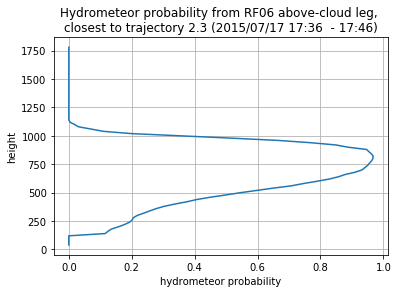

In [169]:
plt.plot(mean, heights)
plt.grid(True)
plt.ylabel('height')
plt.xlabel('hydrometeor probability')
plt.title("Hydrometeor probability from RF06 above-cloud leg, \n" +
         "closest to trajectory 2.3 ({:%Y/%m/%d %H:%M } - {:%H:%M})".format(st ,et))
plt.savefig("RF06 2.3 hydrometeor probability.png")
#plt.pcolormesh(times, heights, hydro)
#plt.colorbar()

In [171]:
utils.CSET_date_from_table(71915, 64251)

datetime.datetime(2015, 7, 19, 17, 50, 51, tzinfo=<UTC>)

In [3]:
fname = '/home/disk/eos10/imccoy/CSET_RadarLidarData/RF10_COMBINED_HCR_HSRL_data_mask_version4.cdf'
data = xr.open_dataset(fname)
st = utils.CSET_date_from_table(72715, 60777)
et = utils.CSET_date_from_table(72715, 61386)
date = nc4.num2date(data.absolute_time.values.astype('timedelta64[s]').astype('float'), units=data.absolute_time.long_name)
data = data.reindex(copy=False, time=date)
survey_leg = data.sel(time=slice(st, et))

/home/disk/p/jkcm/Code/Lagrangian_CSET/utils.py:977: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if isinstance(d, pd.tslib.Timestamp):


In [4]:
heights = survey_leg.range.values[survey_leg.range.values<1800]
mask = np.rot90(survey_leg.combined_mask.values[:,survey_leg.range.values<1800], k=3)
refl = np.rot90(survey_leg.dBZ.values[:,survey_leg.range.values<1800], k=3)
hydro = (mask>0).astype(float)
times = survey_leg.time.values
mean = np.mean(hydro, axis=1)

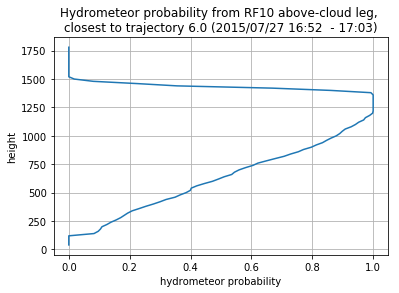

In [5]:
plt.plot(mean, heights)
plt.grid(True)
plt.ylabel('height')
plt.xlabel('hydrometeor probability')
plt.title("Hydrometeor probability from RF10 above-cloud leg, \n" +
         "closest to trajectory 6.0 ({:%Y/%m/%d %H:%M } - {:%H:%M})".format(st ,et))
plt.savefig("RF10 6.0 hydrometeor probability.png")
#plt.pcolormesh(times, heights, hydro)
#plt.colorbar()